### Summer 2024: Time Series Analysis

#### Final project - Create visualizations

This project creates visualizations for average annual salaries for earners who complete different education levels.
Education levels range from "Not a high school graduate" up to "Advanced degree".



**Load cleaned data**

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib

import pandas as pd

%matplotlib inline

In [28]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pd.__version__))

matplotlib: 3.8.3
pandas: 2.2.1


In [29]:
salaries_df = pd.read_csv('data/salary_clean.csv')
salaries_df.head()

,year,total_earners,total_earners_salary,no_high_school_earners,no_high_school_salary,high_school_earners,high_school_salary,some_college_earners,some_college_salary,bachelors_earners,bachelors_salary,adv_earners,adv_salary
0,2021,165282,63050,10886,31050,43930,42850,44019,48070,41873,80380,24572,110600
1,2020,164611,72520,10985,35940,42240,39498,45240,44176,41910,73499,24236,104833
2,2019,167216,52380,11414,22810,42599,39371,46886,45091,42153,73163,24164,106766
3,2018,165179,64340,12058,31870,42882,38936,46887,43053,40231,71155,23118,99919
4,2017,163871,74320,12240,36980,42816,38145,47382,41507,39153,67763,22277,98369


#### Plot salary growth for each education category

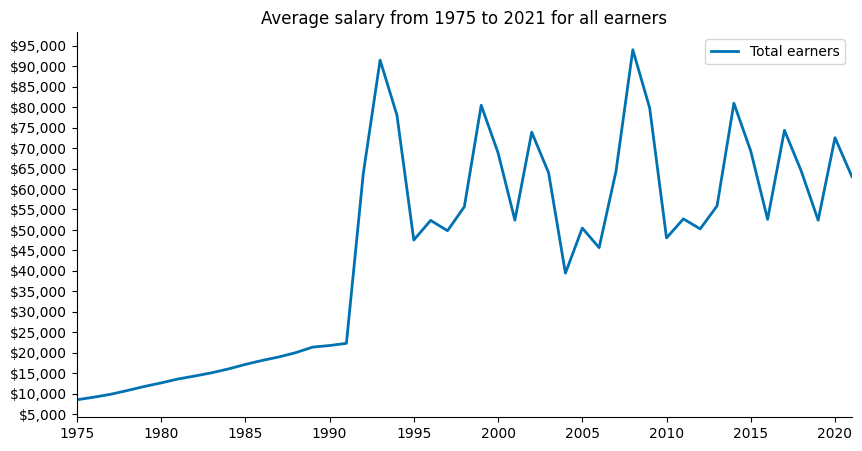

In [30]:
with plt.style.context("seaborn-v0_8-colorblind"):
    fig, ax = plt.subplots(figsize=(10,5))

    # customize line style
    space = 3
    dash_len = 4

    plt.plot(salaries_df['year'], salaries_df['total_earners_salary'], linestyle='solid', lw=2, label='Total earners')


    plt.xlim(1975, 2021)
    plt.locator_params(axis='x', nbins=15)

    plt.locator_params(axis='y', nbins=20)
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid(False)

    plt.title(f"Average salary from 1975 to 2021 for all earners")
    
    plt.legend();

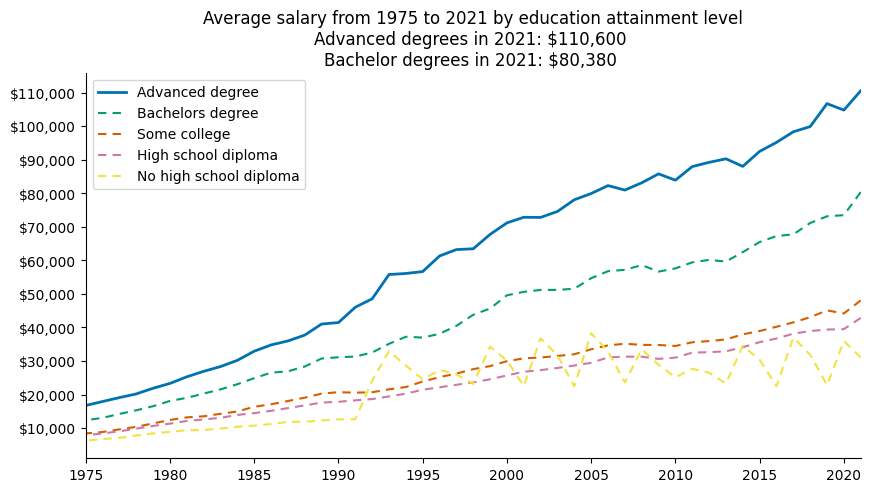

In [31]:
with plt.style.context("seaborn-v0_8-colorblind"):
    fig, ax = plt.subplots(figsize=(10,5))

    # customize line style
    space = 3
    dash_len = 4

    plt.plot(salaries_df['year'], salaries_df['adv_salary'], linestyle='solid', lw=2, label='Advanced degree')
    plt.plot(salaries_df['year'], salaries_df['bachelors_salary'], linestyle='--', dashes=(dash_len, space), label='Bachelors degree')
    plt.plot(salaries_df['year'], salaries_df['some_college_salary'], linestyle='--', dashes=(dash_len, space), label='Some college')
    plt.plot(salaries_df['year'], salaries_df['high_school_salary'], linestyle='--', dashes=(dash_len, space), label='High school diploma')
    plt.plot(salaries_df['year'], salaries_df['no_high_school_salary'], linestyle='--', dashes=(dash_len, space), label='No high school diploma')


    plt.xlim(1975, 2021)
    plt.locator_params(axis='x', nbins=15)

    plt.locator_params(axis='y', nbins=20)
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid(False)

    plt.title(f"Average salary from 1975 to 2021 by education attainment level\n" \
             f"Advanced degrees in 2021: ${salaries_df[salaries_df['year'] == 2021]['adv_salary'].iloc[0]:,} \n" \
             f"Bachelor degrees in 2021: ${salaries_df[salaries_df['year'] == 2021]['bachelors_salary'].iloc[0]:,} ")
    
    plt.legend();

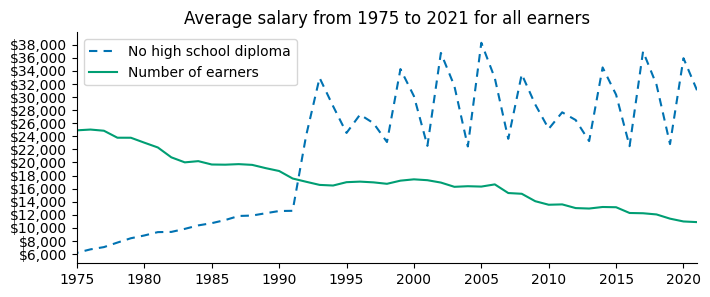

In [34]:
with plt.style.context("seaborn-v0_8-colorblind"):
    fig, ax = plt.subplots(figsize=(8,3))

    # customize line style
    space = 3
    dash_len = 4

    plt.plot(salaries_df['year'], salaries_df['no_high_school_salary'], linestyle='--', dashes=(dash_len, space), label='No high school diploma')
    plt.plot(salaries_df['year'], salaries_df['no_high_school_earners'], linestyle='-', label='Number of earners')

    plt.xlim(1975, 2021)
    plt.locator_params(axis='x', nbins=15)

    plt.locator_params(axis='y', nbins=20)
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid(False)

    plt.title(f"Average salary from 1975 to 2021 for all earners")
    
    plt.legend();

There is a lot of volatility in the salary ranges for earners who are not a high school graduate. Create a new dataset using only earners with at least a high school diploma

In [35]:
salaries_df.columns

Index(['year', 'total_earners', 'total_earners_salary',
       'no_high_school_earners', 'no_high_school_salary',
       'high_school_earners', 'high_school_salary', 'some_college_earners',
       'some_college_salary', 'bachelors_earners', 'bachelors_salary',
       'adv_earners', 'adv_salary'],
      dtype='object')

In [42]:
above_hs_df = salaries_df.drop(['total_earners', 'total_earners_salary', 'no_high_school_earners', 'no_high_school_salary'], axis=1).copy()
above_hs_df.head()

,year,high_school_earners,high_school_salary,some_college_earners,some_college_salary,bachelors_earners,bachelors_salary,adv_earners,adv_salary
0,2021,43930,42850,44019,48070,41873,80380,24572,110600
1,2020,42240,39498,45240,44176,41910,73499,24236,104833
2,2019,42599,39371,46886,45091,42153,73163,24164,106766
3,2018,42882,38936,46887,43053,40231,71155,23118,99919
4,2017,42816,38145,47382,41507,39153,67763,22277,98369


Create a new column for a count of all earners and a weighted average salary

In [48]:
above_hs_df['count_of_all_earners'] = above_hs_df[['high_school_earners', 'some_college_earners', 'bachelors_earners', 'adv_earners']].sum(axis=1)

# Create a weighted average salary

above_hs_df['weighted_sum_salary'] = (above_hs_df['high_school_earners'] * above_hs_df['high_school_salary'] + 
                              above_hs_df['some_college_earners'] * above_hs_df['some_college_salary'] + 
                              above_hs_df['bachelors_earners'] * above_hs_df['bachelors_salary'] + 
                              above_hs_df['adv_earners'] * above_hs_df['adv_salary'])

above_hs_df['weighted_avg_salary'] = round(above_hs_df['weighted_sum_salary'] / above_hs_df['count_of_all_earners'] )

above_hs_df.head()

,year,high_school_earners,high_school_salary,some_college_earners,some_college_salary,bachelors_earners,bachelors_salary,adv_earners,adv_salary,count_of_all_earners,weighted_sum_salary,weighted_avg_salary
0,2021,43930,42850,44019,48070,41873,80380,24572,110600,154394,10081808770,65299.0
1,2020,42240,39498,45240,44176,41910,73499,24236,104833,153626,9287993438,60458.0
2,2019,42599,39371,46886,45091,42153,73163,24164,106766,155802,9455235418,60688.0
3,2018,42882,38936,46887,43053,40231,71155,23118,99919,153118,8860843810,57869.0
4,2017,42816,38145,47382,41507,39153,67763,22277,98369,151628,8444391946,55692.0


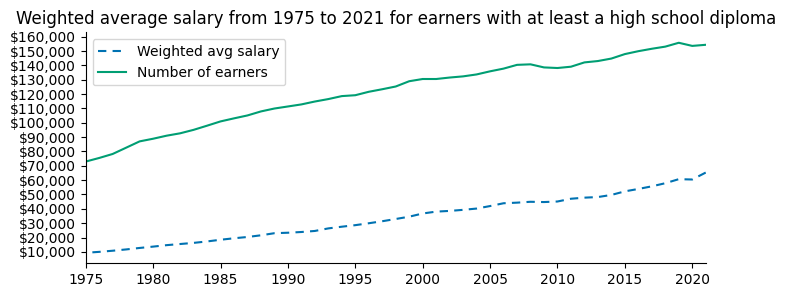

In [50]:
with plt.style.context("seaborn-v0_8-colorblind"):
    fig, ax = plt.subplots(figsize=(8,3))

    # customize line style
    space = 3
    dash_len = 4

    plt.plot(above_hs_df['year'], above_hs_df['weighted_avg_salary'], linestyle='--', dashes=(dash_len, space), label='Weighted avg salary')
    plt.plot(above_hs_df['year'], above_hs_df['count_of_all_earners'], linestyle='-', label='Number of earners')

    plt.xlim(1975, 2021)
    plt.locator_params(axis='x', nbins=15)

    plt.locator_params(axis='y', nbins=20)
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) 
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid(False)

    plt.title(f"Weighted average salary from 1975 to 2021 for earners with at least a high school diploma")
    
    plt.legend();

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [51]:
above_hs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  47 non-null     int64  
 1   high_school_earners   47 non-null     int64  
 2   high_school_salary    47 non-null     int64  
 3   some_college_earners  47 non-null     int64  
 4   some_college_salary   47 non-null     int64  
 5   bachelors_earners     47 non-null     int64  
 6   bachelors_salary      47 non-null     int64  
 7   adv_earners           47 non-null     int64  
 8   adv_salary            47 non-null     int64  
 9   count_of_all_earners  47 non-null     int64  
 10  weighted_sum_salary   47 non-null     int64  
 11  weighted_avg_salary   47 non-null     float64
dtypes: float64(1), int64(11)
memory usage: 4.5 KB


Convert the year column from int to a date object, then set it as the dataframe's index

In [52]:
above_hs_df['year'] = pd.to_datetime(above_hs_df['year'], format='%Y')
above_hs_df.set_index('year', inplace=True)
above_hs_df.head()

,high_school_earners,high_school_salary,some_college_earners,some_college_salary,bachelors_earners,bachelors_salary,adv_earners,adv_salary,count_of_all_earners,weighted_sum_salary,weighted_avg_salary
year,,,,,,,,,,,
2021-01-01,43930,42850,44019,48070,41873,80380,24572,110600,154394,10081808770,65299.0
2020-01-01,42240,39498,45240,44176,41910,73499,24236,104833,153626,9287993438,60458.0
2019-01-01,42599,39371,46886,45091,42153,73163,24164,106766,155802,9455235418,60688.0
2018-01-01,42882,38936,46887,43053,40231,71155,23118,99919,153118,8860843810,57869.0
2017-01-01,42816,38145,47382,41507,39153,67763,22277,98369,151628,8444391946,55692.0


Sort the dataframe so the older years come first

In [53]:
above_hs_df.sort_index(inplace=True)
above_hs_df.head()

,high_school_earners,high_school_salary,some_college_earners,some_college_salary,bachelors_earners,bachelors_salary,adv_earners,adv_salary,count_of_all_earners,weighted_sum_salary,weighted_avg_salary
year,,,,,,,,,,,
1975-01-01,39827,7843,16917,8388,9764,12332,6457,16725,72965,682665930,9356.0
1976-01-01,40570,8393,17786,8813,10132,13033,6985,17911,75473,754410719,9996.0
1977-01-01,41696,9013,18905,9607,10357,14207,7309,19077,78267,844002075,10784.0
1978-01-01,43510,9834,20121,10357,11001,15291,8017,20173,82649,966213769,11691.0
1979-01-01,45497,10624,21174,11377,11751,16514,8621,21874,87043,1106888494,12717.0


#### Additive decomposition

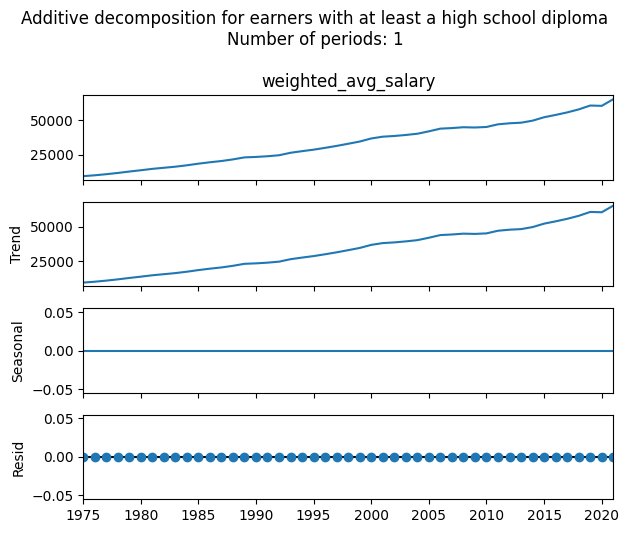

In [64]:
avg_salary_decomp_add = seasonal_decompose(above_hs_df['weighted_avg_salary'], model='additive', period=1)
avg_salary_decomp_add.plot()
plt.suptitle("Additive decomposition for earners with at least a high school diploma\nNumber of periods: 1", fontsize=12, y=1.1)

plt.show()

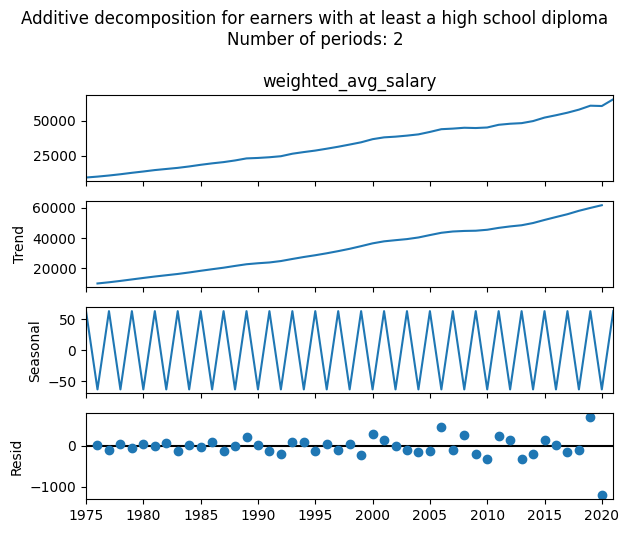

In [65]:
avg_salary_decomp_add_2 = seasonal_decompose(above_hs_df['weighted_avg_salary'], model='additive', period=2)
avg_salary_decomp_add_2.plot()
plt.suptitle("Additive decomposition for earners with at least a high school diploma\nNumber of periods: 2", fontsize=12, y=1.1)

plt.show()

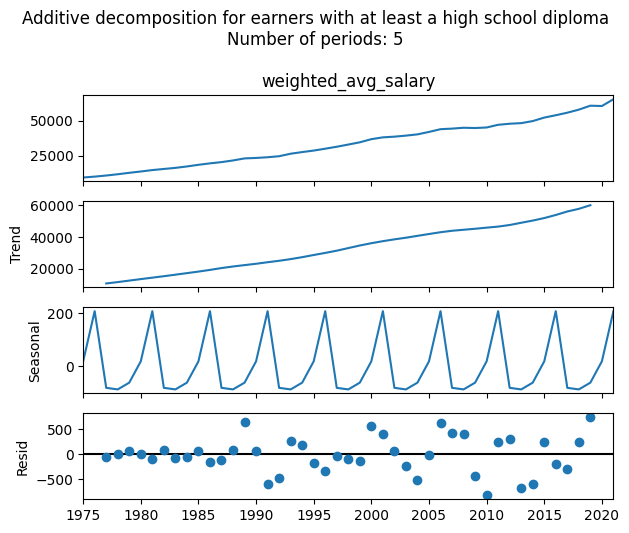

In [66]:
avg_salary_decomp_add_5 = seasonal_decompose(above_hs_df['weighted_avg_salary'], model='additive', period=5)
avg_salary_decomp_add_5.plot()
plt.suptitle("Additive decomposition for earners with at least a high school diploma\nNumber of periods: 5", fontsize=12, y=1.1)

plt.show()

#### Multiplicative decomposition

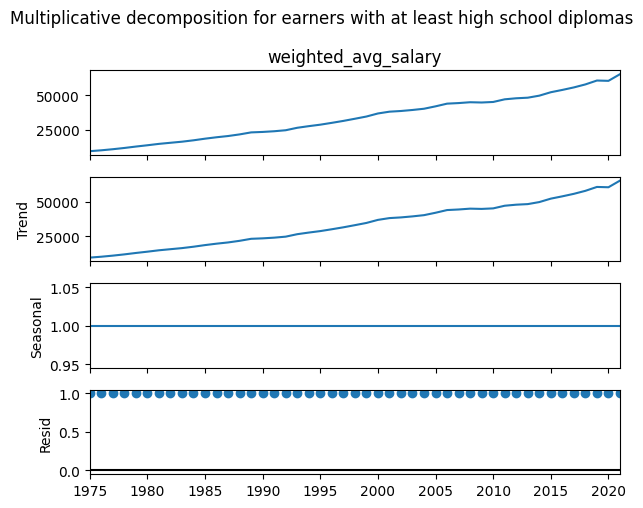

In [59]:
avg_salary_decomp_mult = seasonal_decompose(above_hs_df['weighted_avg_salary'], model='mul', period=1)


avg_salary_decomp_mult.plot()
plt.suptitle("Multiplicative decomposition for earners with at least high school diplomas", fontsize=12, y=1.05)

plt.show()

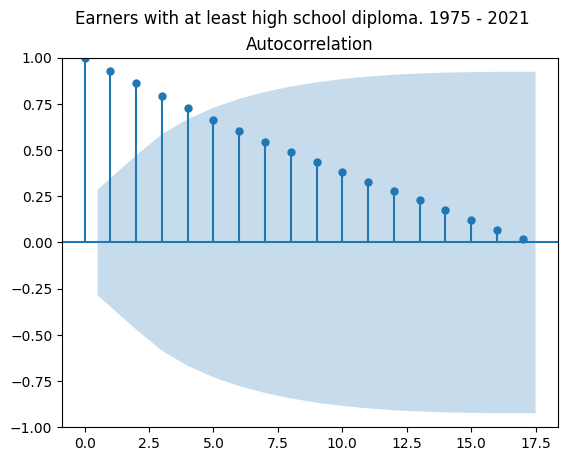

In [60]:
plot_acf(above_hs_df['weighted_avg_salary'])
plt.suptitle("Earners with at least high school diploma. 1975 - 2021", fontsize=12);


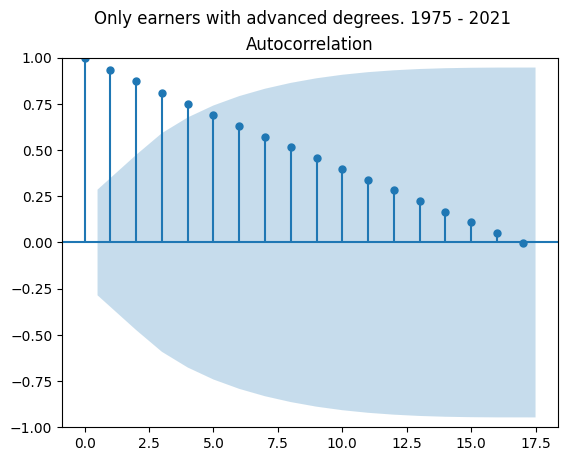

In [61]:
plot_acf(salaries_df['adv_salary'])
plt.suptitle("Only earners with advanced degrees. 1975 - 2021", fontsize=12);